In [70]:
import pandas as pd    # to work with dataframe
import numpy as np     # for mathematical 
import matplotlib.pyplot as plt  # plot
import seaborn as sns         # color

from sklearn.model_selection import train_test_split    # data ko batna into train and test
from sklearn.preprocessing import LabelEncoder, StandardScaler  # data cleaning
from sklearn.decomposition import PCA  # bda ko chota
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve, f1_score, precision_score, recall_score
)
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [71]:
df = pd.read_csv('student-data.csv')
print("First five rows of the dataset:")
display(df.head())

First five rows of the dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [73]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64


In [74]:
df.fillna(df.mode().iloc[0], inplace=True)
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("Data after encoding and imputation:")
display(df.head())


Data after encoding and imputation:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,1,0,0,4,4,0,4,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,1,0,1,1,1,0,2,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,1,1,1,1,1,0,2,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,1,0,1,3,3,2,2,...,0,0,4,3,2,1,2,5,4,1


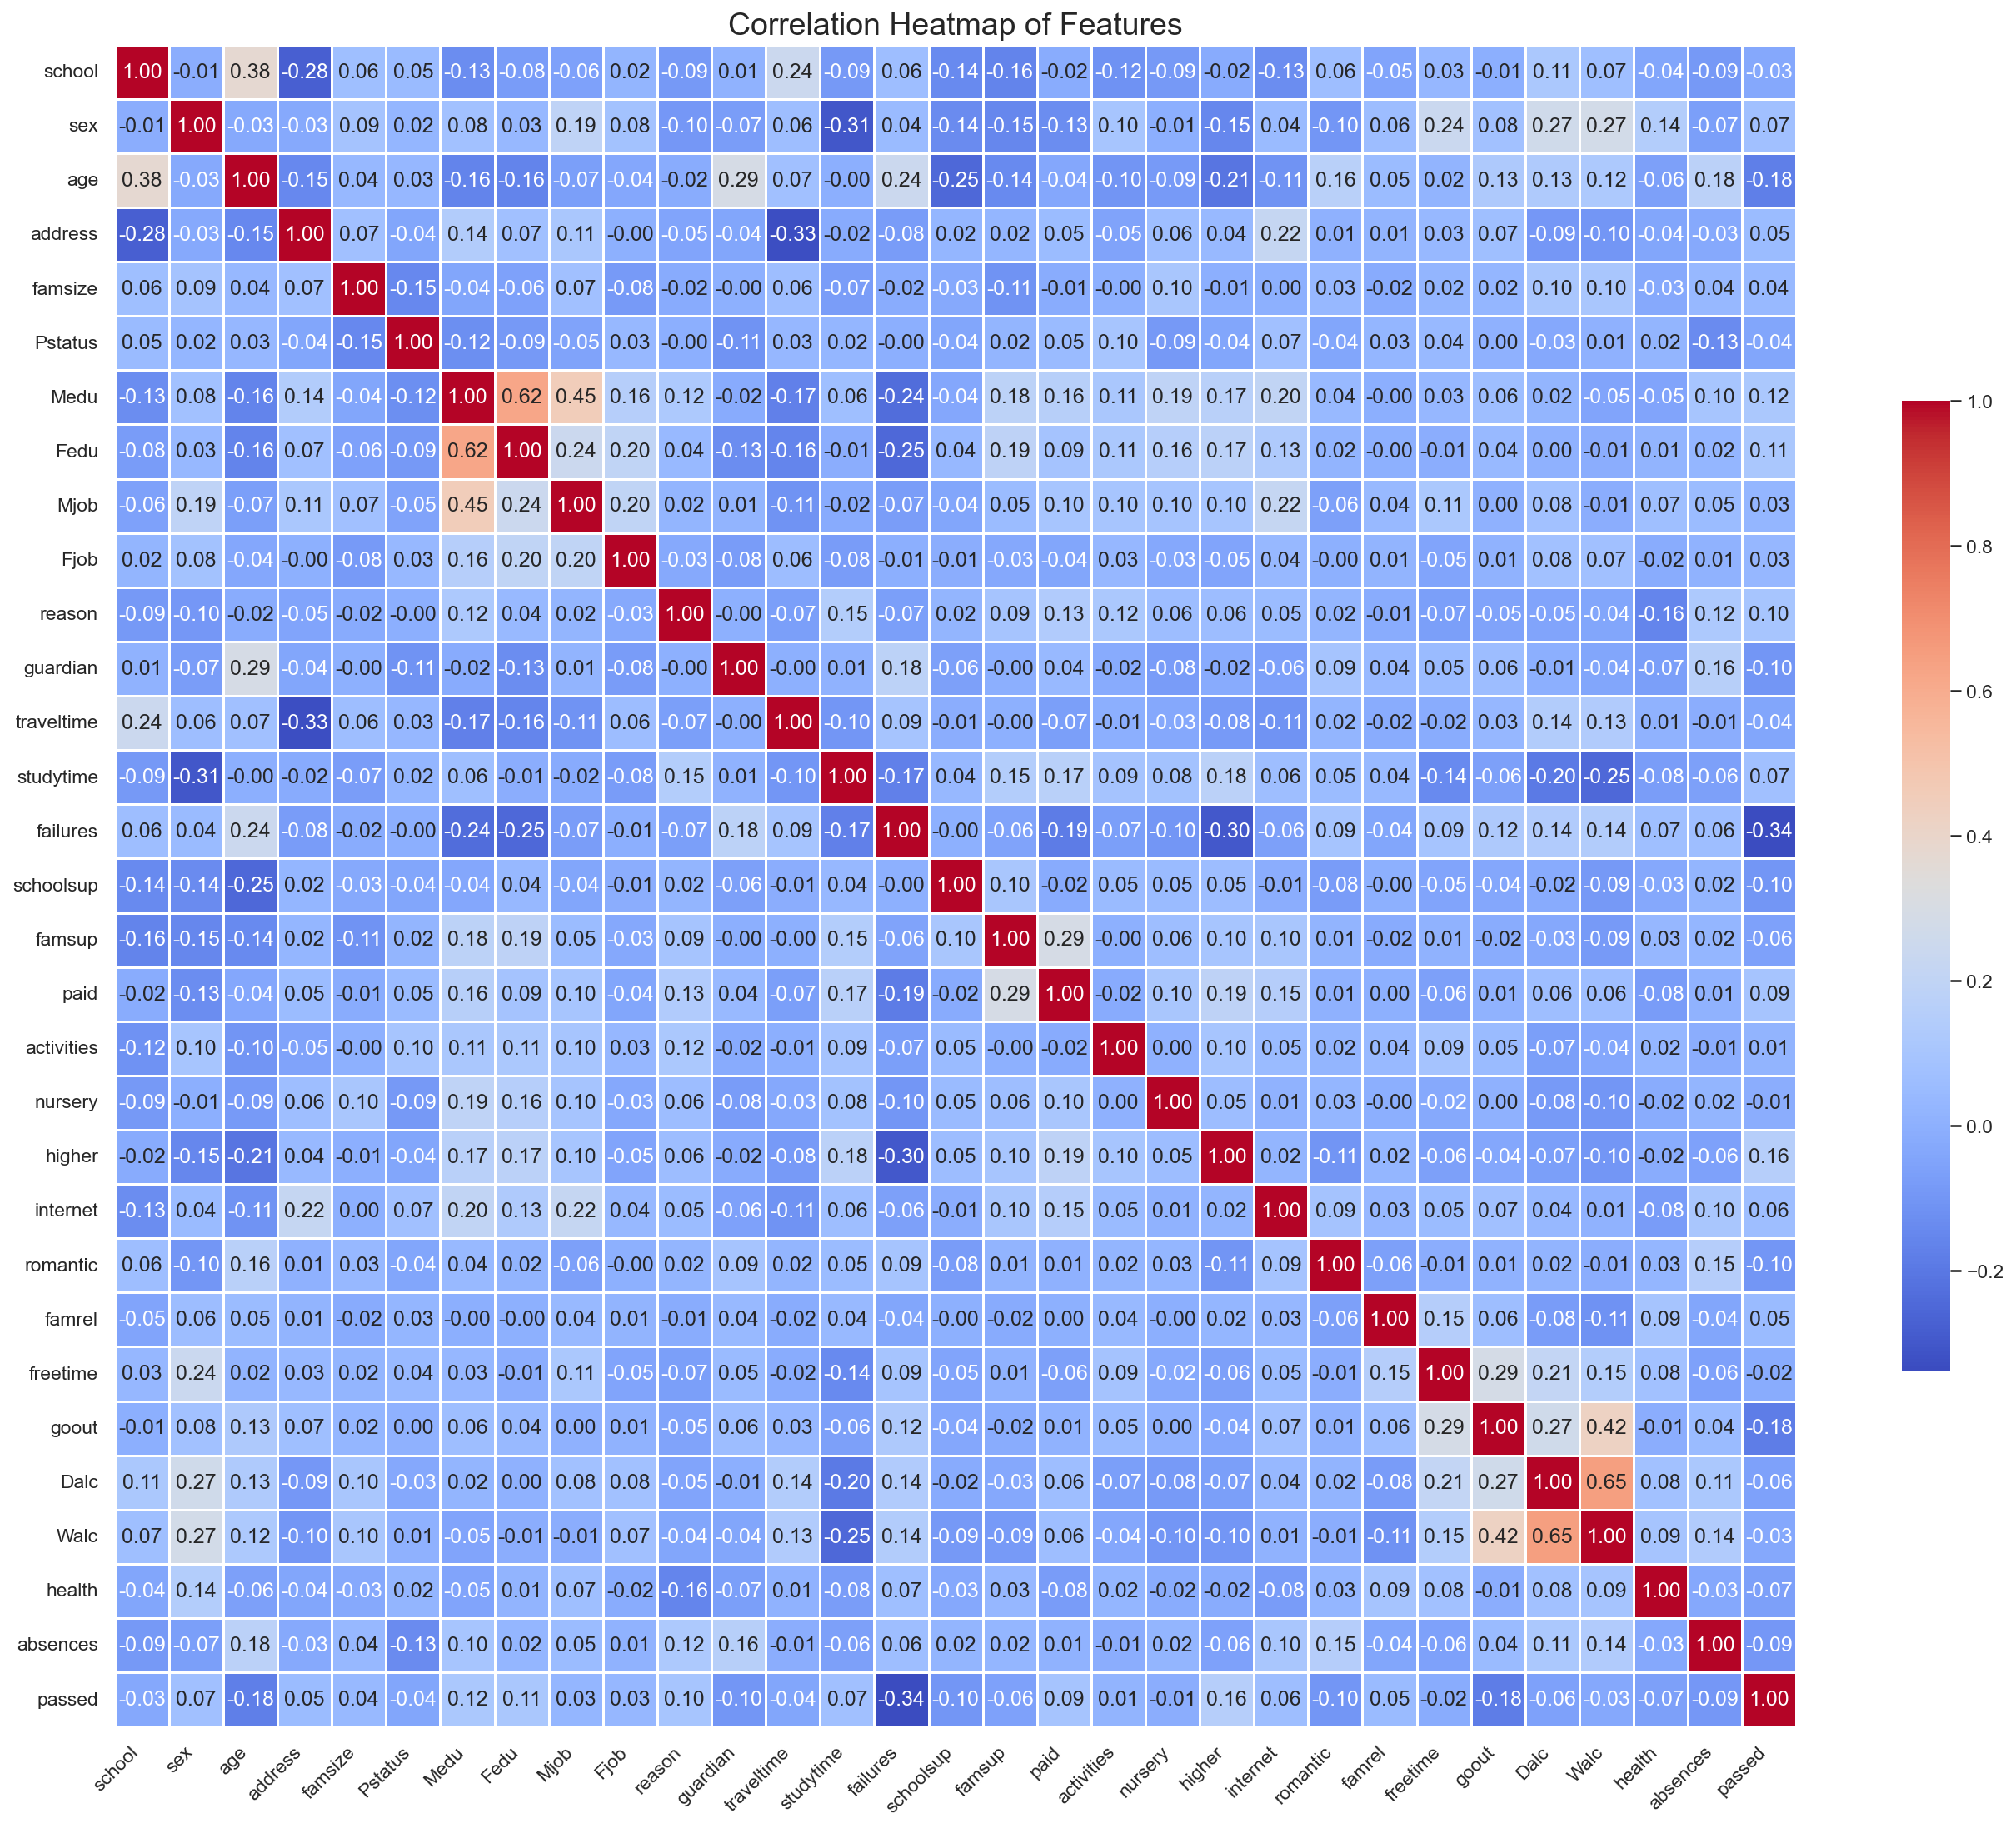

In [75]:
plt.figure(figsize=(18, 16), dpi=150)
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.5})
plt.title('Correlation Heatmap of Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


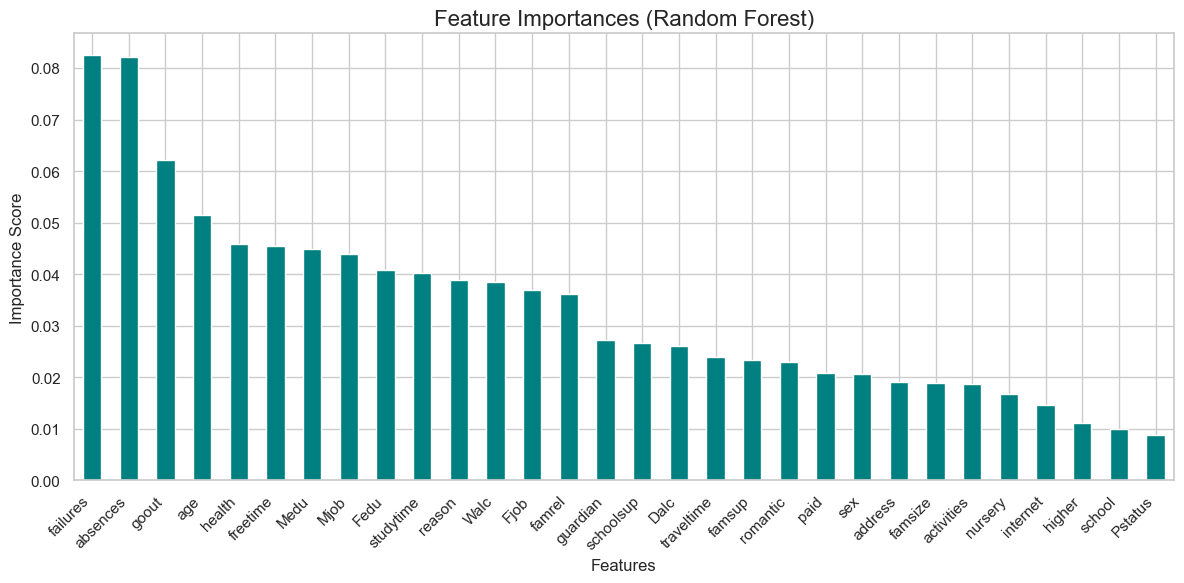

In [77]:
target_column = [col for col in df.columns if 'pass' in col.lower()][0]
X = df.drop(target_column, axis=1)
y = df[target_column]

# Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances.plot(kind='bar', color='teal')
plt.title('Feature Importances (Random Forest)', fontsize=16)
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Original features: 30 | PCA components: 26


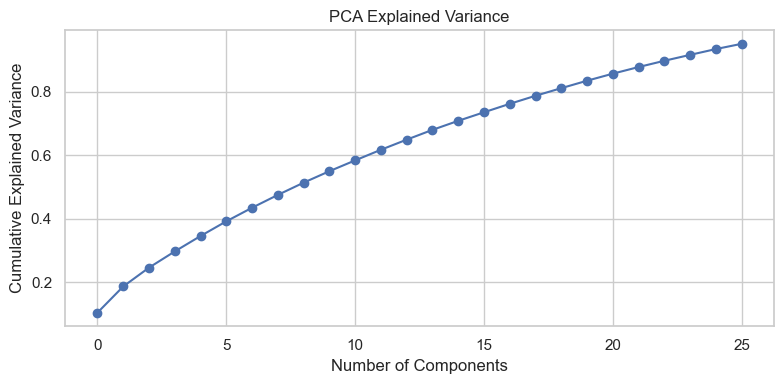

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"Original features: {X.shape[1]} | PCA components: {X_pca.shape[1]}")

plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)


In [80]:
class ManualLogisticRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.n_iter):
            z = np.dot(X, self.theta) + self.bias
            h = self.sigmoid(z)
            gradient_theta = np.dot(X.T, (h - y)) / y.size
            gradient_bias = np.sum(h - y) / y.size
            self.theta -= self.lr * gradient_theta
            self.bias -= self.lr * gradient_bias

    def predict(self, X):
        z = np.dot(X, self.theta) + self.bias
        return (self.sigmoid(z) >= 0.5).astype(int)

    def predict_proba(self, X):
        z = np.dot(X, self.theta) + self.bias
        return self.sigmoid(z)


In [81]:
class ManualKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        preds = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            indices = np.argsort(distances)[:self.k]
            votes = self.y_train[indices]
            preds.append(np.bincount(votes).argmax())
        return np.array(preds)

    def predict_proba(self, X):
        probas = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            indices = np.argsort(distances)[:self.k]
            votes = self.y_train[indices]
            proba = np.sum(votes) / self.k
            probas.append(proba)
        return np.array(probas)


In [82]:
class ManualSVM:
    def __init__(self, lr=0.001, lambda_param=0.01, n_iter=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iter = n_iter

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                condition = y_[idx] * (np.dot(xi, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(xi, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.where(np.dot(X, self.w) - self.b >= 0, 1, 0)

    def predict_proba(self, X):
        decision = np.dot(X, self.w) - self.b
        proba = 1 / (1 + np.exp(-decision))
        return proba

In [83]:
logreg = ManualLogisticRegression(lr=0.1, n_iter=1000)
knn = ManualKNN(k=5)
svm = ManualSVM(lr=0.001, lambda_param=0.01, n_iter=1000)

logreg.fit(X_train, y_train.values)
knn.fit(X_train, y_train.values)
svm.fit(X_train, y_train.values)

models = {
    'Manual Logistic Regression': logreg,
    'Manual KNN': knn,
    'Manual SVM': svm
}

In [85]:
results = {}
for name, model in models.items():
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)
    results[name] = {
        'preds': preds,
        'probs': probs,
        'accuracy': accuracy_score(y_test, preds),
        'precision': precision_score(y_test, preds),
        'recall': recall_score(y_test, preds),
        'f1': f1_score(y_test, preds),
        'auc': roc_auc_score(y_test, probs)
    }
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, preds))
    print("-"*60)

Manual Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        26
           1       0.74      0.85      0.79        53

    accuracy                           0.70        79
   macro avg       0.65      0.62      0.62        79
weighted avg       0.68      0.70      0.68        79

------------------------------------------------------------
Manual KNN Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.27      0.37        26
           1       0.72      0.91      0.80        53

    accuracy                           0.70        79
   macro avg       0.65      0.59      0.58        79
weighted avg       0.67      0.70      0.66        79

------------------------------------------------------------
Manual SVM Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.19      0.26     

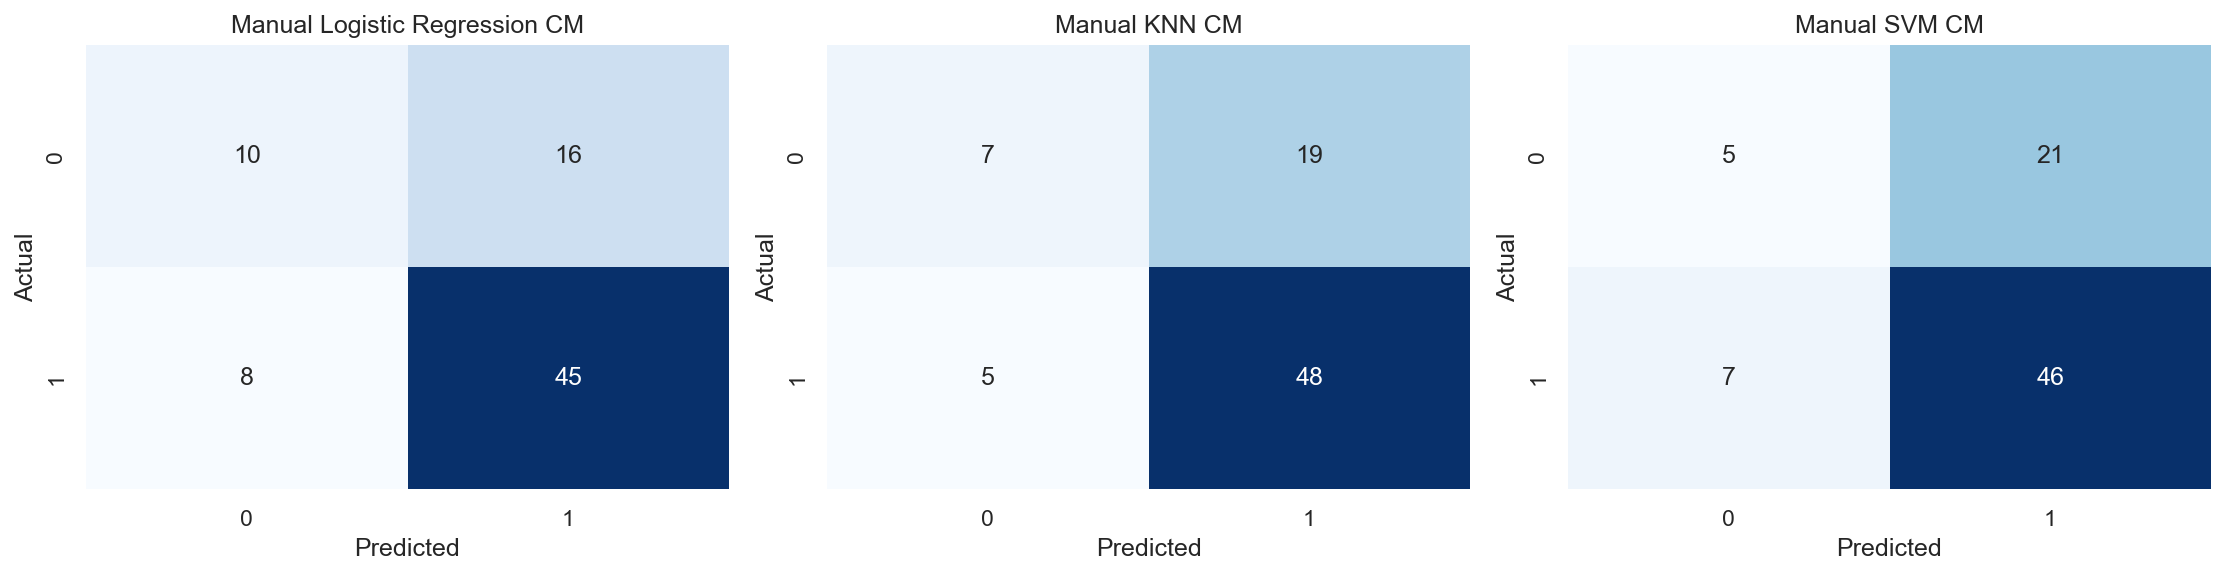

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and a column for each model to show confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 4), dpi=150)

# Loop over each model and its corresponding subplot axis
for ax, (name, res) in zip(axes, results.items()):
    cm = confusion_matrix(y_test, res['preds'])  # Compute confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)  # Plot heatmap
    ax.set_title(f'{name} CM')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

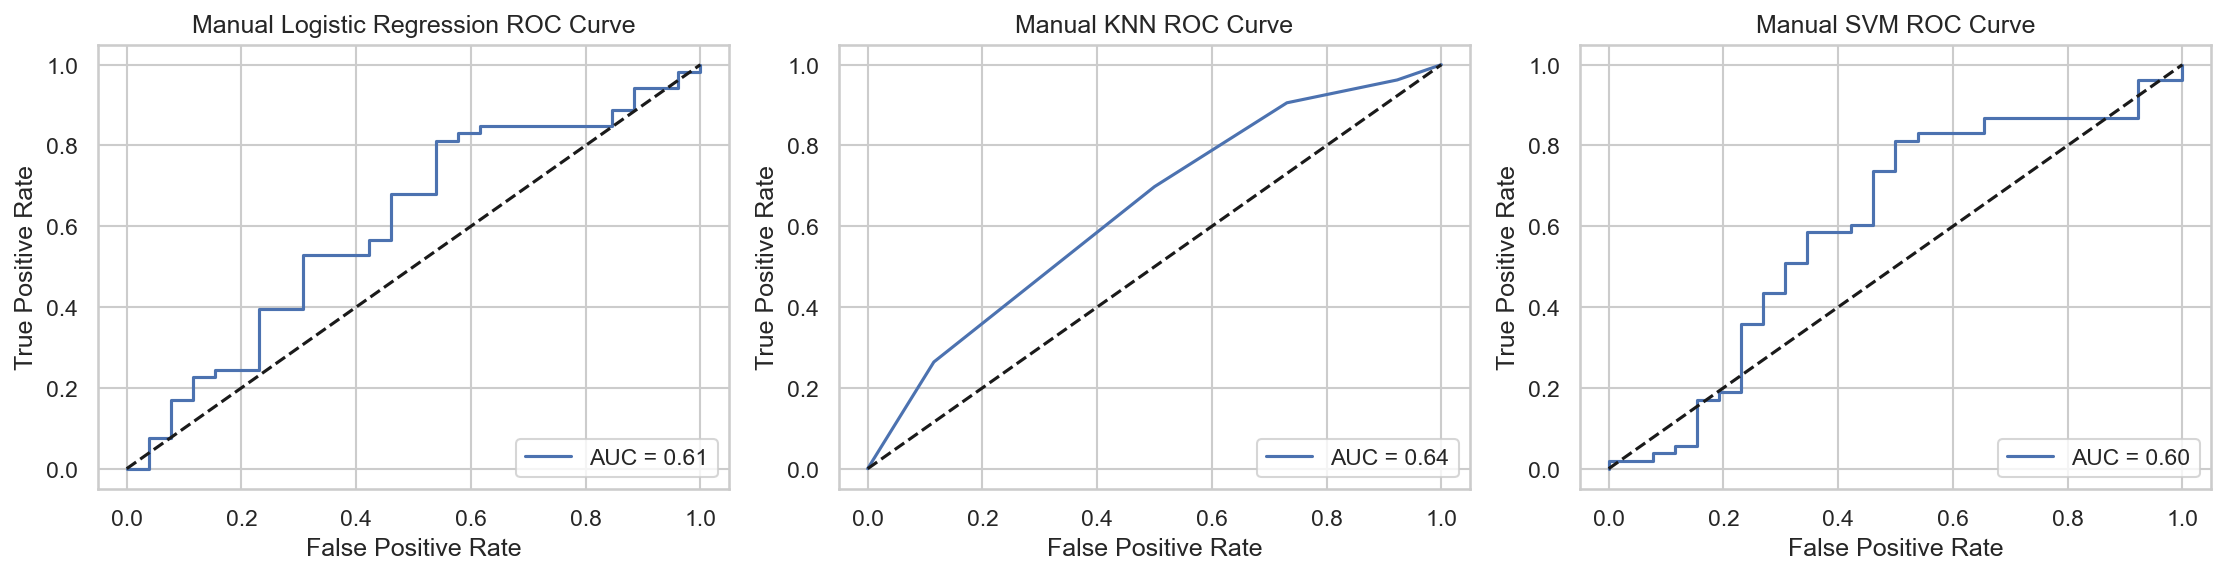

In [97]:
from sklearn.metrics import roc_curve

# Create subplots with 1 row and a column for each model
fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 4), dpi=150)

# Loop to generate and plot ROC curves
for ax, (name, res) in zip(axes, results.items()):
    fpr, tpr, _ = roc_curve(y_test, res['probs'])
    ax.plot(fpr, tpr, label=f'AUC = {res["auc"]:.2f}')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_title(f'{name} ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

plt.tight_layout()
plt.show()


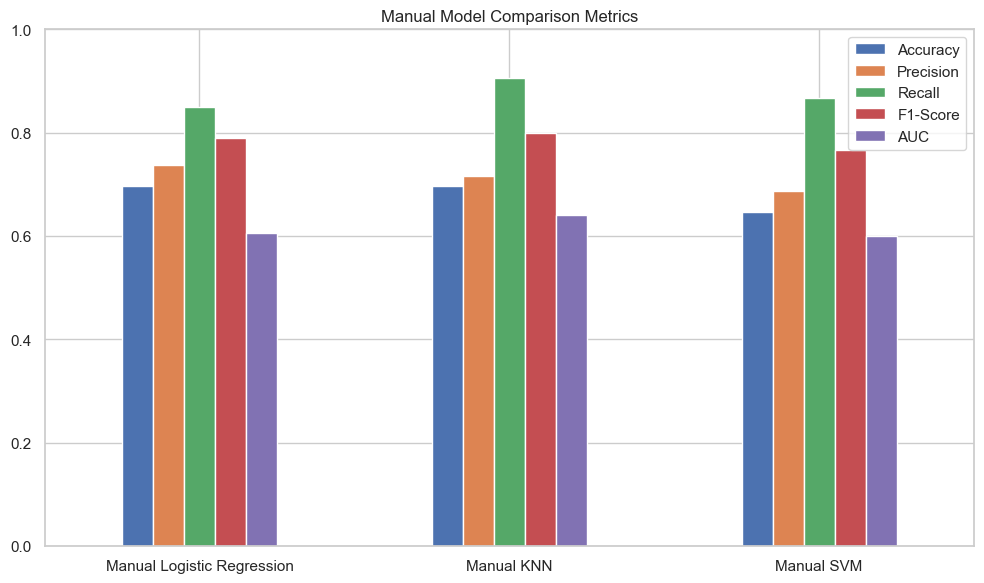

In [90]:
metrics_df = pd.DataFrame({
    name: [res['accuracy'], res['precision'], res['recall'], res['f1'], res['auc']]
    for name, res in results.items()
}, index=['Accuracy','Precision','Recall','F1-Score','AUC']).T

metrics_df.plot(kind='bar', figsize=(10,6))
plt.title('Manual Model Comparison Metrics')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

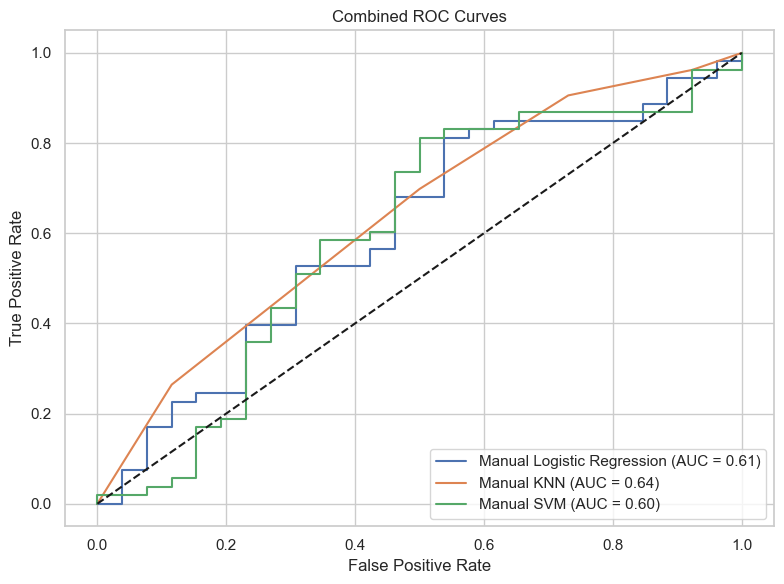

In [98]:
plt.figure(figsize=(8, 6))

# Loop through all models to plot combined ROC curves
for name in results:
    fpr, tpr, _ = roc_curve(y_test, results[name]['probs'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["auc"]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('Combined ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [106]:
from sklearn.preprocessing import StandardScaler

# Display model choices for user selection
print("Available models:")
for idx, model_name in enumerate(models.keys(), start=1):
    print(f"{idx}. {model_name}")

# Loop until a valid model choice is made
while True:
    try:
        model_choice = int(input("Enter the number of the model to use for prediction (e.g., 1 for first model): ")) - 1
        chosen_model_name = list(models.keys())[model_choice]
        chosen_model = models[chosen_model_name]
        break
    except (ValueError, IndexError):
        print("Invalid model number. Please enter a valid number corresponding to the models listed.")

# Display feature list for selection
print("\nAvailable features:")
for idx, feature in enumerate(X.columns, start=1):
    print(f"{idx}. {feature}")

# Loop until valid feature indices are provided
while True:
    try:
        selected_indices = input("Enter the numbers of the features to use separated by commas (e.g., 1,3,5): ")
        selected_indices = [int(idx.strip()) - 1 for idx in selected_indices.split(',')]
        selected_features = [X.columns[idx] for idx in selected_indices]
        break
    except (ValueError, IndexError):
        print("Invalid input. Please enter valid numbers separated by commas from the listed features.")

# Sample feature descriptions and permissible values
feature_info = {
    'school': ("Type of school student attends", "0 = School 1, 1 = School 2"),
    'sex': ("Sex of the student", "0 = Female, 1 = Male"),
    'age': ("Age of the student", "Integer from 15 to 22"),
    'address': ("Student's home address type", "0 = Urban, 1 = Rural"),
    'famsize': ("Family size", "0 = LE3 (<=3), 1 = GT3 (>3)"),
    'Pstatus': ("Parent's cohabitation status", "0 = Together, 1 = Apart"),
    'Medu': ("Mother's education level", "Integer 0 to 4"),
    'Fedu': ("Father's education level", "Integer 0 to 4"),
    'Mjob': ("Mother's job", "0 = teacher, 1 = health, 2 = services, 3 = at_home, 4 = other"),
    'Fjob': ("Father's job", "0 = teacher, 1 = health, 2 = services, 3 = at_home, 4 = other"),
    'reason': ("Reason to choose school", "0 = home, 1 = reputation, 2 = course, 3 = other"),
    'guardian': ("Guardian", "0 = mother, 1 = father, 2 = other"),
    'traveltime': ("Travel time to school", "1 = <15min, 2 = 15-30min, 3 = 30min-1hr, 4 = >1hr"),
    'studytime': ("Weekly study time", "1 = <2h, 2 = 2-5h, 3 = 5-10h, 4 = >10h"),
    'failures': ("Number of past class failures", "Integer from 0 to 3"),
    'schoolsup': ("Extra educational support", "0 = no, 1 = yes"),
    'famsup': ("Family educational support", "0 = no, 1 = yes"),
    'paid': ("Extra paid classes", "0 = no, 1 = yes"),
    'activities': ("Extra-curricular activities", "0 = no, 1 = yes"),
    'nursery': ("Attended nursery school", "0 = no, 1 = yes"),
    'higher': ("Wants to pursue higher education", "0 = no, 1 = yes"),
    'internet': ("Internet access at home", "0 = no, 1 = yes"),
    'romantic': ("In a romantic relationship", "0 = no, 1 = yes"),
    'famrel': ("Quality of family relationships", "Scale 1 (very bad) to 5 (excellent)"),
    'freetime': ("Free time after school", "Scale 1 (very low) to 5 (very high)"),
    'goout': ("Going out with friends", "Scale 1 (very low) to 5 (very high)"),
    'Dalc': ("Workday alcohol consumption", "Scale 1 (very low) to 5 (very high)"),
    'Walc': ("Weekend alcohol consumption", "Scale 1 (very low) to 5 (very high)"),
    'health': ("Current health status", "Scale 1 (very bad) to 5 (very good)"),
    'absences': ("Number of school absences", "Non-negative integer")
}

print("\nEnter values for the selected features:")
user_input = {}
for feature in selected_features:
    while True:
        print(f"\nFeature: {feature}")
        if feature in feature_info:
            description, permissible = feature_info[feature]
            print(f"Description: {description}")
            print(f"Permissible values: {permissible}")
        else:
            print("Description: No description available.")
            print("Permissible values: Enter a valid numeric value.")

        val = input(f"Enter value for '{feature}': ")
        try:
            user_input[feature] = float(val)
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Fill in missing values with the mean from training data to ensure all required features are present
for col in X.columns:
    if col not in user_input:
        user_input[col] = X[col].mean()

# Ensure DataFrame is ordered correctly to match training data
user_df = pd.DataFrame([[user_input[feature] for feature in X.columns]], columns=X.columns)

# Scale and transform the input before prediction
user_scaled = scaler.transform(user_df)
user_pca = pca.transform(user_scaled)

# Make prediction using selected model
prediction = chosen_model.predict(user_pca)[0]
label = 'Pass' if prediction == 1 else 'Fail'
print(f"\nPrediction using {chosen_model_name}: {label}")


Available models:
1. Manual Logistic Regression
2. Manual KNN
3. Manual SVM


Enter the number of the model to use for prediction (e.g., 1 for first model):  3



Available features:
1. school
2. sex
3. age
4. address
5. famsize
6. Pstatus
7. Medu
8. Fedu
9. Mjob
10. Fjob
11. reason
12. guardian
13. traveltime
14. studytime
15. failures
16. schoolsup
17. famsup
18. paid
19. activities
20. nursery
21. higher
22. internet
23. romantic
24. famrel
25. freetime
26. goout
27. Dalc
28. Walc
29. health
30. absences


Enter the numbers of the features to use separated by commas (e.g., 1,3,5):  15,30



Enter values for the selected features:

Feature: failures
Description: Number of past class failures
Permissible values: Integer from 0 to 3


Enter value for 'failures':  3



Feature: absences
Description: Number of school absences
Permissible values: Non-negative integer


Enter value for 'absences':  50



Prediction using Manual SVM: Fail


In [ ]:

# 1) Identify best model by F1-Score
best_model_name = metrics_df['F1-Score'].idxmax()
best_model = models[best_model_name]
print(f"Using best model: {best_model_name}")

# 2) Automatically pick top 3 features by importance
top_feats = importances.nlargest(3).index.tolist()
print("Top 3 features selected automatically:")
for f in top_feats:
    desc, perm = feature_info.get(f, ("No description", "Any numeric value"))
    print(f"- {f}: {desc} (Permissible: {perm})")

# 3) Prompt user to enter values for these features with validation
user_vals = {}
for f in top_feats:
    desc, perm = feature_info.get(f, ("No description", "Any numeric value"))
    while True:
        val = input(f"Enter value for '{f}' ({desc}, permissible {perm}): ")
        try:
            user_vals[f] = float(val)
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# 4) Fill in missing features with the mean from training data
for col in X.columns:
    if col not in user_vals:
        user_vals[col] = X[col].mean()

# 5) Create DataFrame in correct column order, then scale and PCA
user_df = pd.DataFrame([[user_vals[col] for col in X.columns]], columns=X.columns)
user_scaled = scaler.transform(user_df)
user_pca = pca.transform(user_scaled)

# 6) Predict and show confidence if available
pred = best_model.predict(user_pca)[0]
label = 'Pass' if pred == 1 else 'Fail'
if hasattr(best_model, 'predict_proba'):
    prob = best_model.predict_proba(user_pca)
    confidence = prob[0][1] if prob.ndim == 2 else prob[0]
    print(f"Prediction: {label} ({confidence * 100:.2f}% confidence)")
else:
    print(f"Prediction: {label} (no probability available)")

Using best model: Manual KNN
Top 3 features selected automatically:
- failures: Number of past class failures (Permissible: Integer from 0 to 3)
- absences: Number of school absences (Permissible: Non-negative integer)
- goout: Going out with friends (Permissible: Scale 1 (very low) to 5 (very high))
